In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/DTree/tree.csv')
print(df)

Mounted at /content/drive
     BI-RADS  Age  Shape  Margin  Density  Target
0          5   67      3       5        3       1
1          5   58      4       5        3       1
2          4   28      1       1        3       0
3          5   57      1       5        3       1
4          5   76      1       4        3       1
..       ...  ...    ...     ...      ...     ...
825        4   47      2       1        3       0
826        4   56      4       5        3       1
827        4   64      4       5        3       0
828        5   66      4       5        3       1
829        4   62      3       3        3       0

[830 rows x 6 columns]


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   BI-RADS  830 non-null    int64
 1   Age      830 non-null    int64
 2   Shape    830 non-null    int64
 3   Margin   830 non-null    int64
 4   Density  830 non-null    int64
 5   Target   830 non-null    int64
dtypes: int64(6)
memory usage: 39.0 KB
None

 First 5 Rows:
   BI-RADS  Age  Shape  Margin  Density  Target
0        5   67      3       5        3       1
1        5   58      4       5        3       1
2        4   28      1       1        3       0
3        5   57      1       5        3       1
4        5   76      1       4        3       1

 Summary Statistics:
          BI-RADS         Age       Shape      Margin     Density      Target
count  830.000000  830.000000  830.000000  830.000000  830.000000  830.000000
mean     4.393976   55.781928    2.781928    2.813253    2.915663  

/tmp/ipython-input-3750146790.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='pastel')


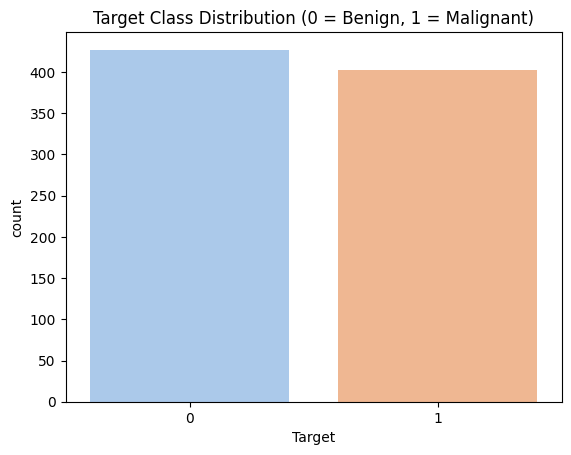

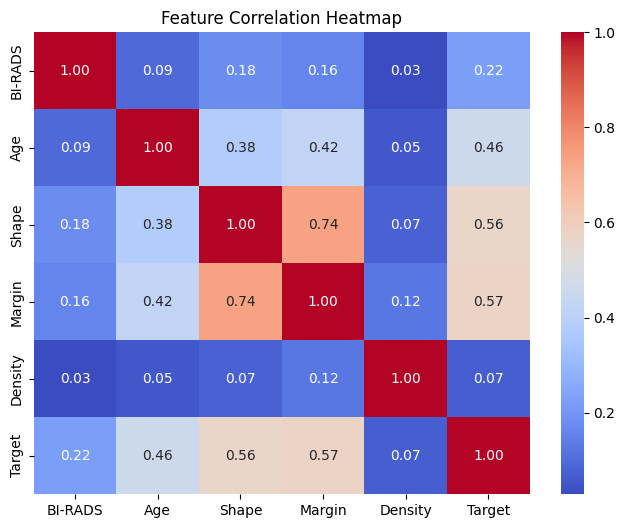

In [20]:
print(" Dataset Info:")
print(df.info())
print("\n First 5 Rows:")
print(df.head())
print("\n Summary Statistics:")
print(df.describe())

print("\n Missing Values:")
print(df.isnull().sum())

print("\n Target Value Counts:")
print(df['Target'].value_counts())

sns.countplot(x='Target', data=df, palette='pastel')
plt.title("Target Class Distribution (0 = Benign, 1 = Malignant)")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Target
0    427
1    403
Name: count, dtype: int64


/tmp/ipython-input-2171516254.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Target", data=df, palette="Set2")


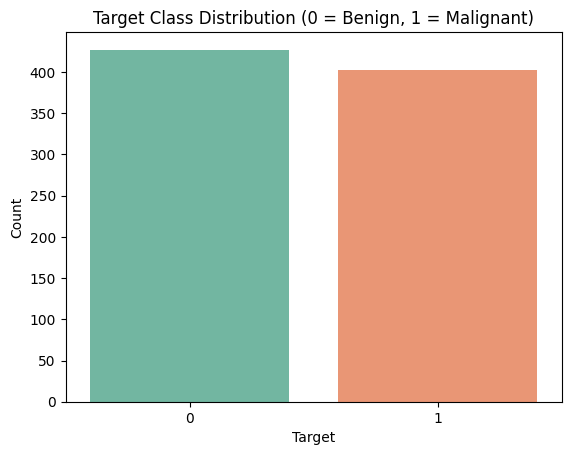

In [5]:
target_counts = df["Target"].value_counts()
print(target_counts)

sns.countplot(x="Target", data=df, palette="Set2")
plt.title("Target Class Distribution (0 = Benign, 1 = Malignant)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


 Dataset Shape: (830, 6)

 Column Names: ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Target']

 Summary Statistics (numeric):
       BI-RADS     Age   Shape  Margin  Density  Target
count   830.00  830.00  830.00  830.00   830.00  830.00
mean      4.39   55.78    2.78    2.81     2.92    0.49
std       1.89   14.67    1.24    1.57     0.35    0.50
min       0.00   18.00    1.00    1.00     1.00    0.00
25%       4.00   46.00    2.00    1.00     3.00    0.00
50%       4.00   57.00    3.00    3.00     3.00    0.00
75%       5.00   66.00    4.00    4.00     3.00    1.00
max      55.00   96.00    4.00    5.00     4.00    1.00

 Target Class Distribution:
Target
0    427
1    403


/tmp/ipython-input-881165617.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='pastel')


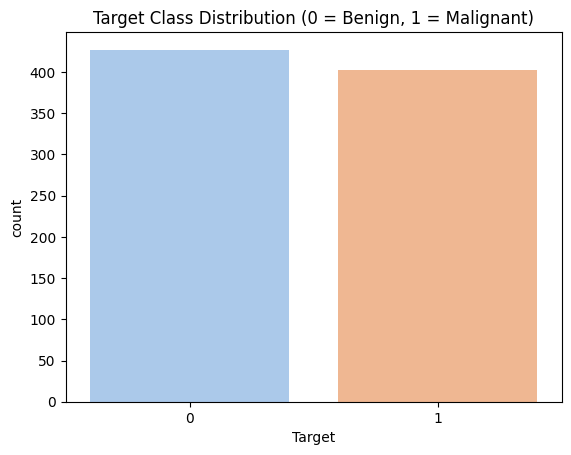

In [21]:

print(" Dataset Shape:", df.shape)
print("\n Column Names:", list(df.columns))
print("\n Summary Statistics (numeric):")
print(df.describe().round(2))

print("\n Target Class Distribution:")
print(df['Target'].value_counts().to_string())

sns.countplot(x='Target', data=df, palette='pastel')
plt.title("Target Class Distribution (0 = Benign, 1 = Malignant)")
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop("Target", axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(" Train–Test Split Complete!")
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nTraining Target Distribution:")
print(y_train.value_counts())
print("\nTesting Target Distribution:")
print(y_test.value_counts())

 Train–Test Split Complete!
Training set size: (581, 5)
Test set size: (249, 5)

Training Target Distribution:
Target
0    299
1    282
Name: count, dtype: int64

Testing Target Distribution:
Target
0    128
1    121
Name: count, dtype: int64


In [23]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

print(clf)


DecisionTreeClassifier(random_state=42)


In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

print(" Decision Tree Classifier has been trained successfully!")



 Decision Tree Classifier has been trained successfully!


In [25]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    class_weight=None,
    criterion='gini',
    max_depth=None,
    max_features=None,
    max_leaf_nodes=None,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    random_state=None,
    splitter='best'
)

print(" Decision Tree Classifier instance created successfully!")
print(clf)

 Decision Tree Classifier instance created successfully!
DecisionTreeClassifier()


In [15]:
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop("Target", axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

clf.fit(X_train, y_train)


score = clf.score(X_test, y_test)

print(f" Model Accuracy: {score:.4f}")

 Model Accuracy: 0.7671
